In [1]:
import matplotlib.pyplot as plt


In [2]:
def data_plot(filename):
    f = open(filename, 'r')
    lines = f.readlines()
    y_tmp = lines[0].split(',')
    y = [float(i) for i in y_tmp]
    x_tmp = lines[1].split(',')
    x = [float(i) for i in x_tmp]

    plt.figure(figsize=(10,3))
    plt.grid(True)
    plt.plot(x, y)
    plt.show()
    
    return [x, y]

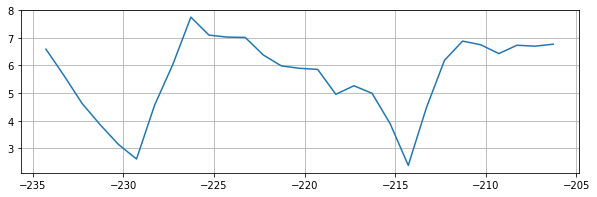

In [3]:
[x1, y1] = data_plot('../../git/scenario_runner/data2.txt')

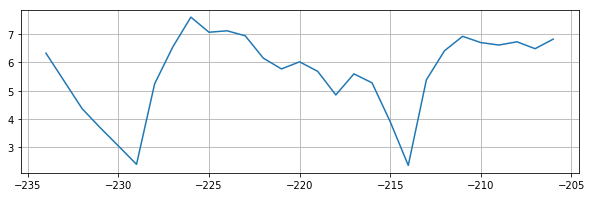

In [4]:
[x2, y2] = data_plot('../../git/scenario_runner/data3.txt')

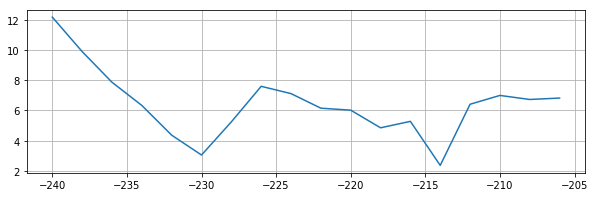

In [6]:
[x3, y3] = data_plot('../../git/scenario_runner/data_odd.txt')

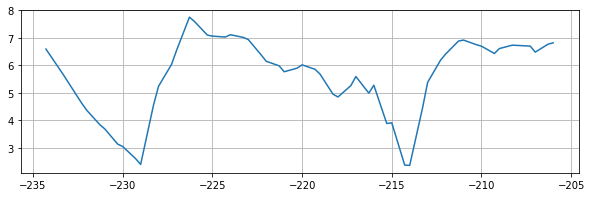

In [7]:
result_x = [None]*(len(x1)+len(x2))
result_x[::2] = x1
result_x[1::2] = x2

result_y = [None]*(len(y1)+len(y2))
result_y[::2] = y1
result_y[1::2] = y2

plt.figure(figsize=(10,3))
plt.grid(True)
plt.plot(result_x, result_y)
plt.show()

In [11]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np

In [12]:
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
X = np.array(result_x).reshape(-1, 1)
Y = result_y
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X, Y)

NameError: name 'GaussianProcessRegressor' is not defined

In [28]:
x_pred = np.linspace(-200, -240).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

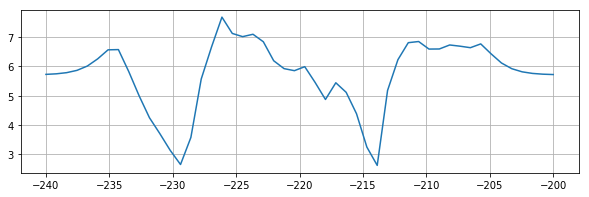

In [29]:
plt.figure(figsize=(10,3))
plt.grid(True)
plt.plot(x_pred, y_pred)
plt.show()

In [83]:
def do_go(x_training, y_training, kernel):
    X = np.array(x_training).reshape(-1, 1)
    # Observations
    y = y_training
    
    #for prediction
    x = np.linspace(-234, -206, 300).reshape(-1,1)

    # Instantiate a Gaussian Process model
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(X, y)

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)
    print(np.min(y_pred))
    print(x[np.argmin(y_pred)])

    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    plt.figure(figsize=(10,5))
    plt.plot(X, y, 'r.', markersize=10, label='Observations')
    plt.plot(x, y_pred, 'b-', label='Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x-position$')
    plt.ylabel('$min. distance$')
    plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    plt.show

2.541449369410042
[-214.33444816]
2.3790037281703555
[-214.33444816]


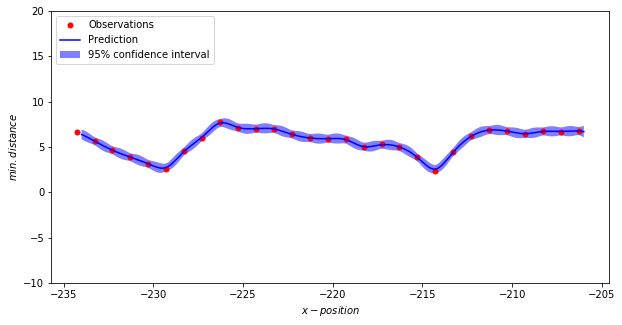

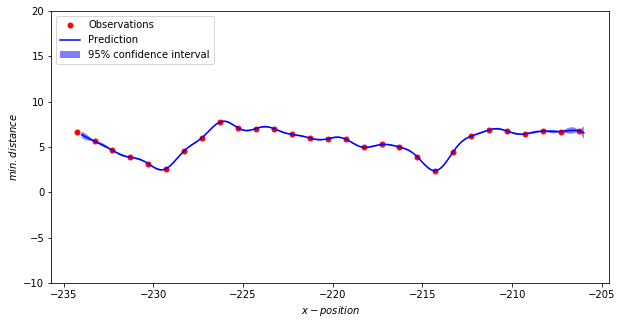

In [85]:
kernel1 = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
kernel2 = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
do_go(x1, y1, kernel1)
do_go(x1, y1, kernel2)

2.7768605016691197
[-229.31772575]
2.2049758655528393
[-229.31772575]


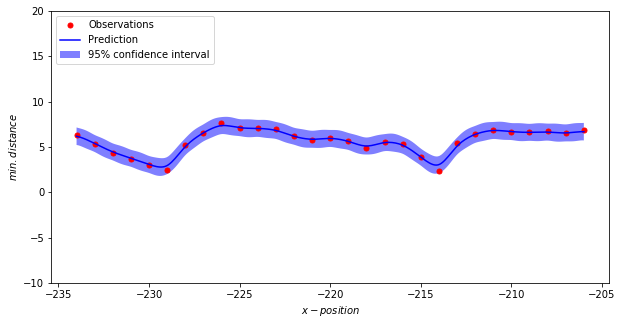

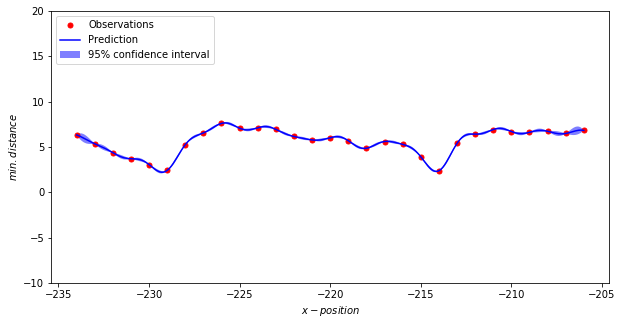

In [86]:
do_go(x2, y2, kernel1)
do_go(x2, y2, kernel2)

3.408681713311166
[-229.78595318]
2.1987545088777267
[-229.31772575]


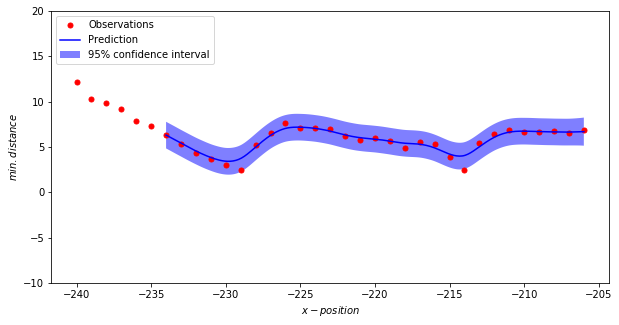

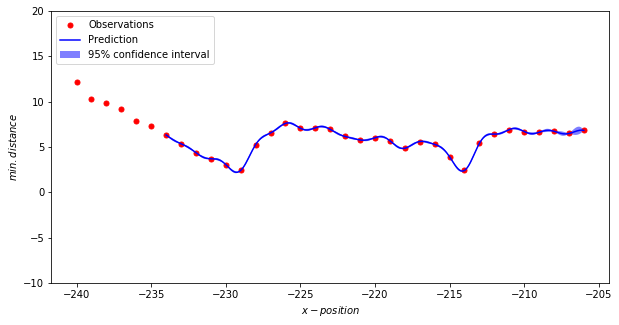

In [87]:
do_go(x3, y3, kernel1)
do_go(x3, y3, kernel2)

2.3377791129722567
[-214.14715719]
2.257709001869898
[-214.14715719]


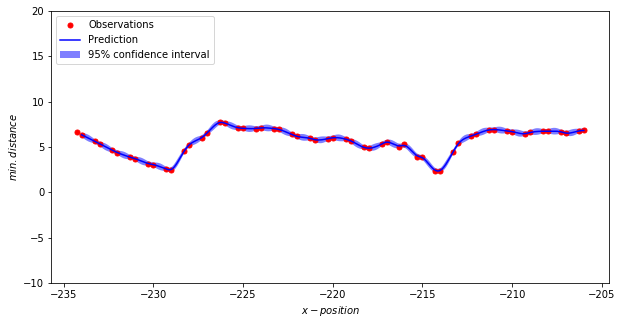

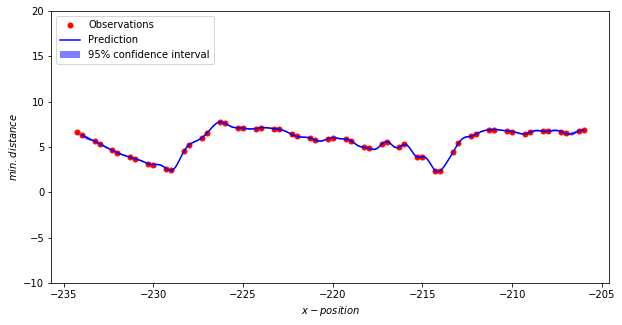

In [88]:
do_go(result_x, result_y, kernel1)
do_go(result_x, result_y, kernel2)

2.541464331988017
[-214.33444816]
2.541449938627192
[-214.33444816]
2.7705973873328134
[-214.33444816]
2.541455443687539
[-214.33444816]


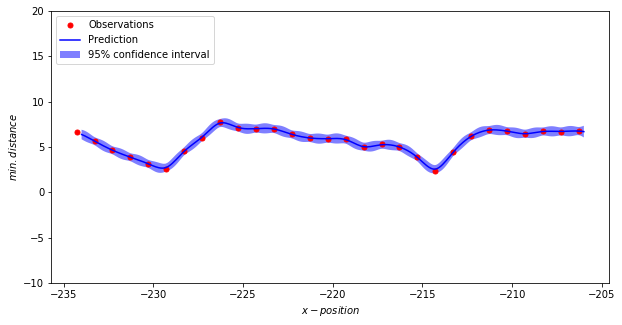

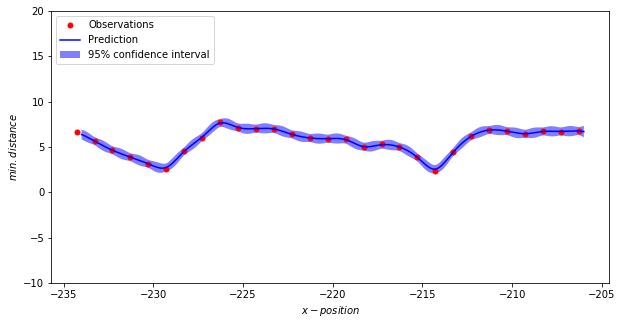

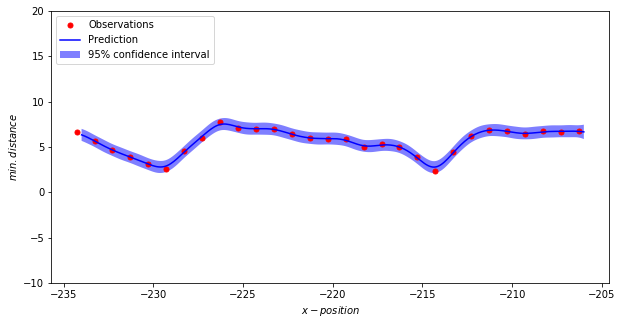

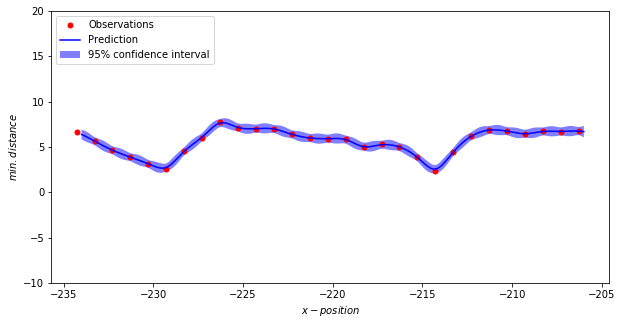

In [89]:
kernel1 = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
kernel3 = ConstantKernel() + Matern(length_scale=1, nu=3/2) + WhiteKernel(noise_level=1)
kernel4 = ConstantKernel() + Matern(length_scale=2, nu=5/2) + WhiteKernel(noise_level=1)
kernel5 = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=0.01)
do_go(x1, y1, kernel1)
do_go(x1, y1, kernel3)
do_go(x1, y1, kernel4)
do_go(x1, y1, kernel5)